# Introduction to trackintel

This tutorial will show you the most important functionalities of trackintel.

Trackintel focuses on the hierachical data model for movement data. The details of each level are explained in [readme.md](https://github.com/mie-lab/trackintel/blob/master/README.md)

![title](../docs/assets/hierarchy.png)


You can enter the hierarchy from any level and generate higher aggregation data and perform multiple analysis with your input data.

To get started, we import trackintel and other necessary libraries.



In [1]:
# This is not needed if the trackintel library is installed. ==================
import sys
sys.path.append("..")
sys.path.append("../trackintel")
# =============================================================================

import trackintel as ti
import geopandas as gpd
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

# Data import
As a first step, we need to import the raw data and convert it into trackintel compatible format. In this example we use a stored GEOJSON file that contains raw positionfixes, and import it using GeoPandas _read_file()_ function. 

In [2]:
# we read geojson files using geopandas function
gdf = gpd.read_file('./data/pfs_tutorial.geojson')
gdf.head(5)

,id,lat,lon,elevation,time,User,accuracy,geometry
0,0,39.984702,116.318417,149.9616,2008-10-23 02:53:04+00:00,0,NaN,POINT (116.31842 39.98470)
1,1,39.984683,116.318450,149.9616,2008-10-23 02:53:10+00:00,0,NaN,POINT (116.31845 39.98468)
2,2,39.984686,116.318417,149.9616,2008-10-23 02:53:15+00:00,0,NaN,POINT (116.31842 39.98469)
3,3,39.984688,116.318385,149.9616,2008-10-23 02:53:20+00:00,0,NaN,POINT (116.31839 39.98469)
4,4,39.984655,116.318263,149.9616,2008-10-23 02:53:25+00:00,0,NaN,POINT (116.31826 39.98465)


gdf is currently a GeoDataFrame and not in the right shape to be used with trackintel.
If you try to create Positionfixes an error will occur.

In [25]:
# an error will occur as the gdf is not yet transformed
# ti.Positionfixes(gdf)

From the error message it is clear that the column names are not yet recognized by trackintel. We provide helper functions to easily transform a GeoDataFrame into trackintel classes. One of them is [positionfixes_from_gpd](https://trackintel.readthedocs.io/en/latest/modules/io.html#geodataframe-import). The method allows to rename the columns and define a timezone. The index is assumed to be the unique identifier of the data.

In [6]:
pfs = ti.io.read_positionfixes_gpd(gdf, tracked_at="time", user_id="User", geom_col="geometry", tz='UTC')
# pfs is of class Positionfixes that has the generate_staypoints method
pfs, sp = pfs.generate_staypoints()

In [10]:
pfs.head()

,id,lat,lon,elevation,tracked_at,user_id,accuracy,geometry,staypoint_id
0,0,39.984702,116.318417,149.9616,2008-10-23 02:53:04+00:00,0,NaN,POINT (116.31842 39.98470),<NA>
1,1,39.984683,116.318450,149.9616,2008-10-23 02:53:10+00:00,0,NaN,POINT (116.31845 39.98468),<NA>
2,2,39.984686,116.318417,149.9616,2008-10-23 02:53:15+00:00,0,NaN,POINT (116.31842 39.98469),<NA>
3,3,39.984688,116.318385,149.9616,2008-10-23 02:53:20+00:00,0,NaN,POINT (116.31839 39.98469),<NA>
4,4,39.984655,116.318263,149.9616,2008-10-23 02:53:25+00:00,0,NaN,POINT (116.31826 39.98465),<NA>


In [11]:
sp.head()

,user_id,started_at,finished_at,elevation,geometry
id,,,,,
0,0,2008-10-23 09:45:05+00:00,2008-10-23 09:55:56+00:00,43.2816,POINT (116.32158 40.00905)
1,0,2008-10-23 09:55:56+00:00,2008-10-23 10:03:39+00:00,49.3776,POINT (116.32203 40.00933)
2,0,2008-10-23 10:14:46+00:00,2008-10-23 10:20:11+00:00,39.9288,POINT (116.31905 40.00783)
3,0,2008-10-23 10:20:11+00:00,2008-10-23 10:26:35+00:00,53.3400,POINT (116.31951 40.00856)
4,0,2008-10-23 10:31:35+00:00,2008-10-23 10:44:31+00:00,26.2128,POINT (116.32193 40.00884)


This is the recommended way to import data. We also provide functions to directly load data from csv files: [read_positionfixes_csv](https://trackintel.readthedocs.io/en/latest/modules/io.html#csv-file-import). Or load data from Geolife dataset: [read_geolife](https://trackintel.readthedocs.io/en/latest/modules/io.html#trackintel.io.dataset_reader.read_geolife)

In [12]:
# load from csv
ti.io.read_positionfixes_csv('./data/pfs.csv', tz='UTC', sep=";", index_col="id", crs="EPSG:4326")

,user_id,tracked_at,elevation,accuracy,geom
id,,,,,
0,1,2015-11-27 08:00:00+00:00,456,1,POINT (8.54878 47.37652)
1,1,2015-11-27 08:20:22+00:00,524,1,POINT (8.52770 47.39935)
2,1,2015-11-27 12:39:28+00:00,537,1,POINT (8.51169 47.40854)
3,1,2015-11-27 13:57:20+00:00,447,1,POINT (8.54472 47.41144)
4,1,2015-11-28 12:39:28+00:00,537,1,POINT (8.51169 43.40854)
5,1,2015-11-28 13:57:20+00:00,447,1,POINT (8.54472 43.41144)


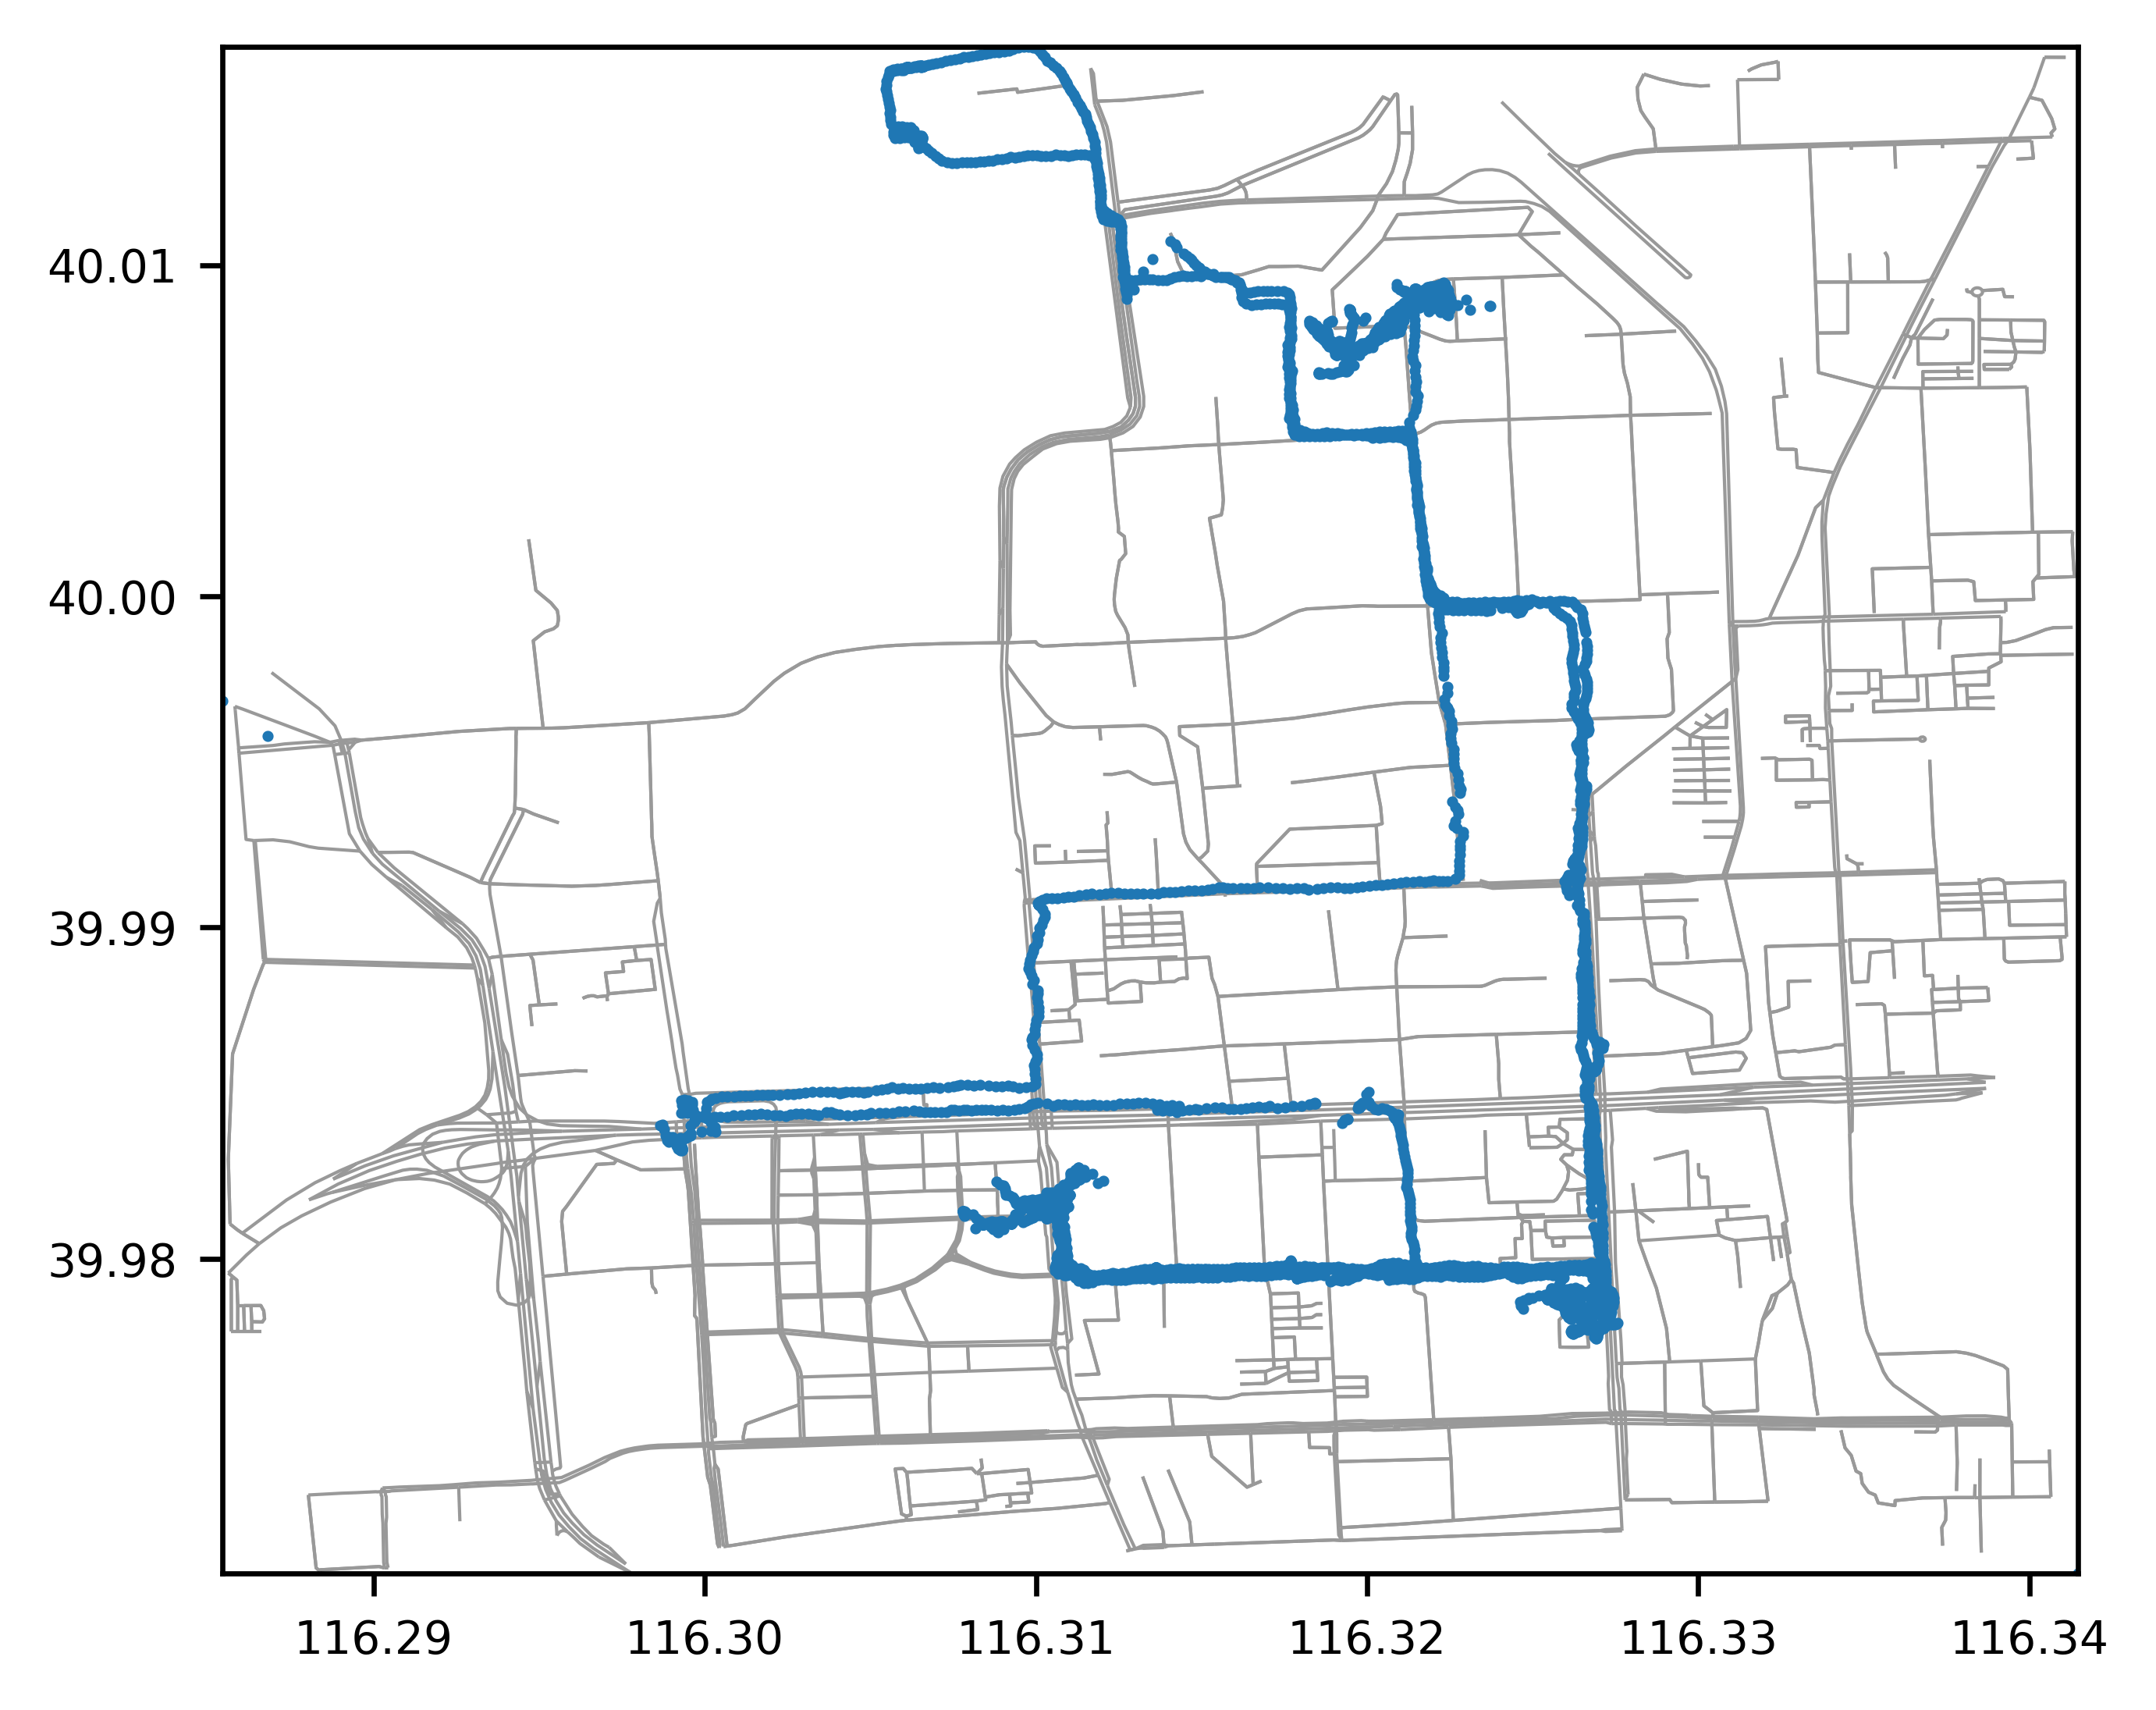

In [13]:
# Load example geolife dataset
pfs, _ = ti.io.read_geolife('../tests/data/geolife_long')
# plot the raw positionfixes
ti.plot(positionfixes=pfs, plot_osm=True)

Once imported trackintel classes like Positionfixes can be used like GeoDataFrames

In [14]:
pfs["new_column"] = 1
pfs.head()

,elevation,tracked_at,geom,user_id,accuracy,new_column
id,,,,,,
0,149.9616,2008-10-23 02:53:04+00:00,POINT (116.31842 39.98470),0,NaN,1
1,149.9616,2008-10-23 02:53:10+00:00,POINT (116.31845 39.98468),0,NaN,1
2,149.9616,2008-10-23 02:53:15+00:00,POINT (116.31842 39.98469),0,NaN,1
3,149.9616,2008-10-23 02:53:20+00:00,POINT (116.31839 39.98469),0,NaN,1
4,149.9616,2008-10-23 02:53:25+00:00,POINT (116.31826 39.98465),0,NaN,1


We provide import data functions for each data level. Detailed information can be found in the [I/O module](https://trackintel.readthedocs.io/en/latest/modules/io.html#)

# Data model generation
All trackintel classes have of course different methods available depending on the data level.
Relevant information can be found in the [Model documentation](https://trackintel.readthedocs.io/en/latest/modules/model.html). Equivalent functions exist for every method and can be called directly from the respective module.

As an example, we generate the staypoints and triplegs with the raw positionfix data.

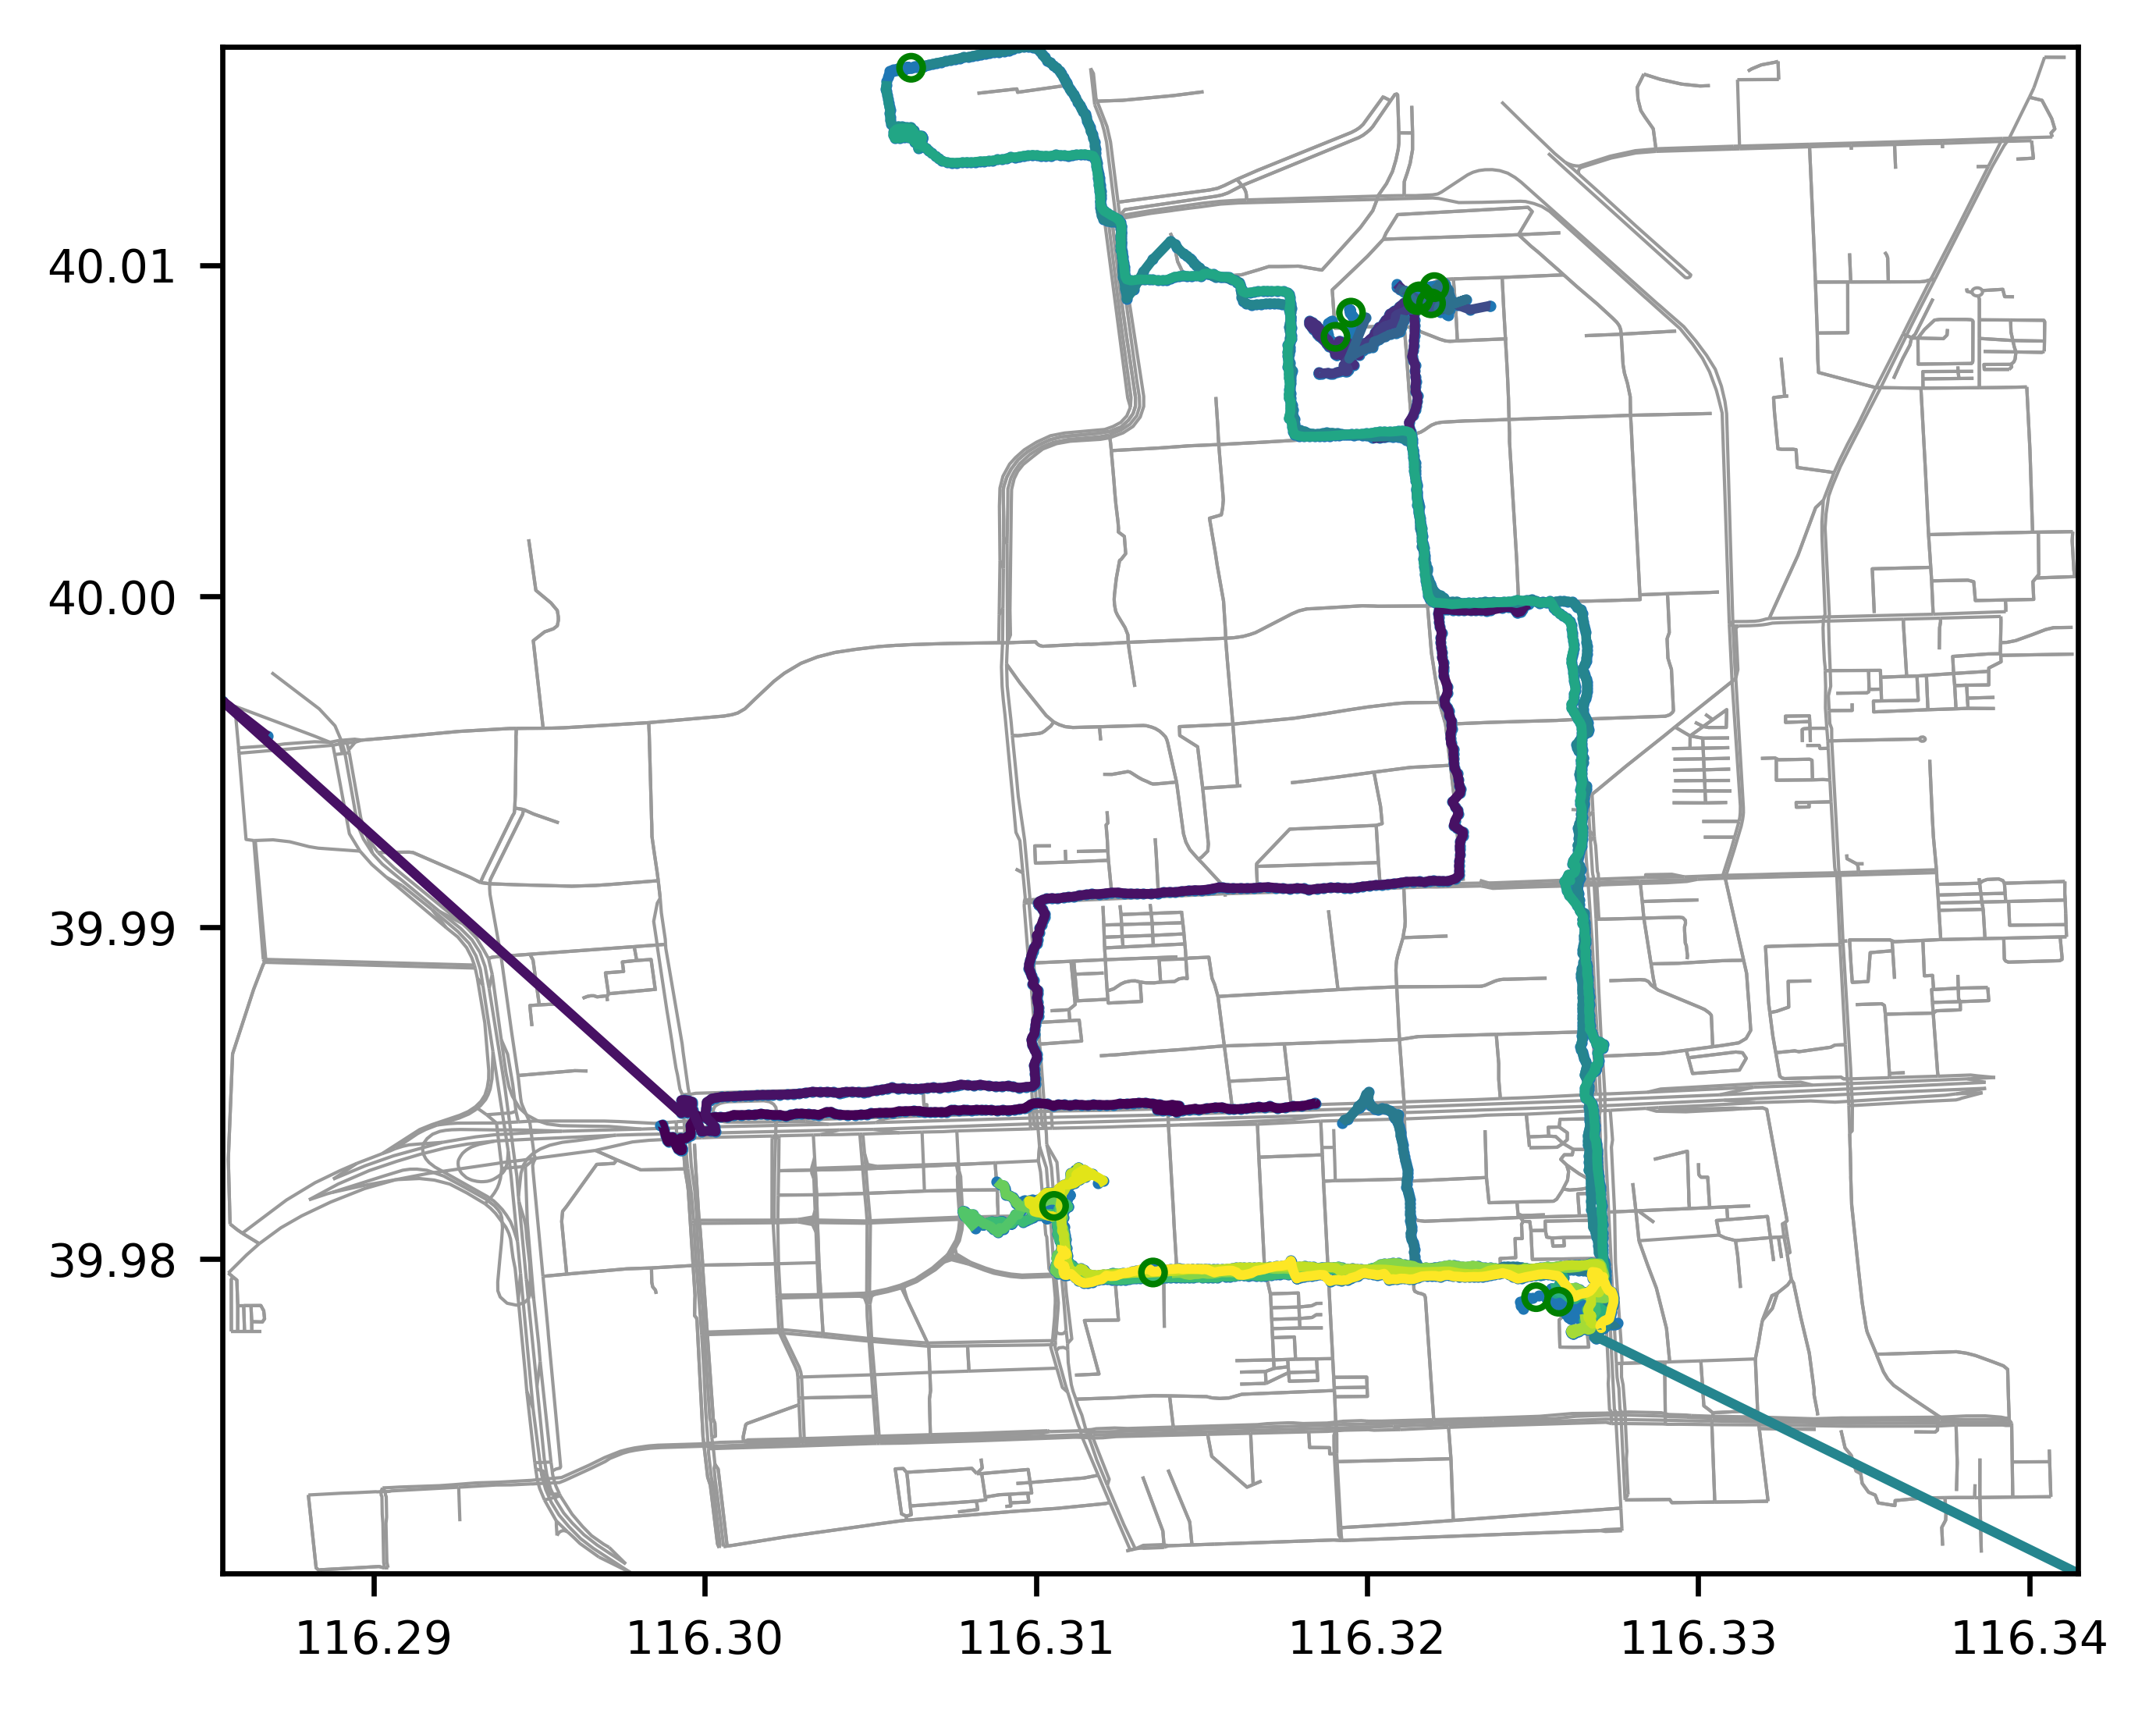

In [15]:
# generate staypoints from positionfixes. The two lines are equivalent
pfs, sp = pfs.generate_staypoints(method='sliding', dist_threshold=100, time_threshold=5.0, include_last=False)
# pfs, sp = ti.preprocessing.generate_staypoints(pfs, method='sliding', dist_threshold=100, time_threshold=5.0, include_last=False)

# generate triplegs from positionfixes and staypoints. 
pfs, tpls = pfs.generate_triplegs(sp, method='between_staypoints', gap_threshold=15)
# pfs, tpls = ti.preprocessing.generate_triplegs(pfs, sp, method="between_staypoints", gap_threshold=15)

# plot the triplegs together with staypoints and positionfixes
ti.plot(triplegs=tpls, positionfixes=pfs, staypoints=sp, radius_sp=30, plot_osm=True)

We can also generate trip as aggregation of triplegs to a single activity, see [generate_trips](https://trackintel.readthedocs.io/en/latest/modules/preprocessing.html#trackintel.preprocessing.triplegs.generate_trips) for more information.

In [16]:
# infer activity label based on duration, here any staypoint larger than 15 min is considered as an activity
sp = sp.create_activity_flag(time_threshold=15)

# generate trips with triplegs and staypoints with activity labels
sp, tpls, trips = ti.preprocessing.generate_trips(sp, tpls, gap_threshold=15)

trips.head(5)

,user_id,started_at,finished_at,geom,origin_staypoint_id,destination_staypoint_id
id,,,,,,
0,0,2008-10-23 02:53:04+00:00,2008-10-23 03:05:15+00:00,"MULTIPOINT (116.31842 39.98470, 116.29866 39.9...",NaN,NaN
1,0,2008-10-23 04:08:07+00:00,2008-10-23 04:34:52+00:00,"MULTIPOINT (116.28680 39.99578, 116.32489 39.9...",NaN,NaN
2,0,2008-10-23 09:42:25+00:00,2008-10-23 10:46:11+00:00,"MULTIPOINT (116.32016 40.00478, 116.32155 40.0...",NaN,NaN
3,0,2008-10-23 11:08:22+00:00,2008-10-23 11:11:12+00:00,"MULTIPOINT (116.32148 40.00885, 116.32089 40.0...",NaN,NaN
4,0,2008-10-24 02:09:59+00:00,2008-10-24 02:47:06+00:00,"MULTIPOINT (116.31988 40.00830, 116.32116 40.0...",NaN,NaN


# Analysis
The [analysis module](https://trackintel.readthedocs.io/en/latest/modules/analysis.html) in *trackintel* focuses on the semantic enrichment and quantitative analysis of human movement data. As an example, we provide labeling functions to infer semantic labels of staypoints and triplegs.


In [17]:
# infer activity label based on duration
sp = sp.create_activity_flag(time_threshold=15)

# the result is the original staypoint with a column 'is_activity', indicating whether the stp correspond to an activity
sp.head(5)

,elevation,finished_at,geom,is_activity,started_at,user_id,prev_trip_id,next_trip_id,trip_id
id,,,,,,,,,
0,43.2816,2008-10-23 09:55:56+00:00,POINT (116.32158 40.00905),False,2008-10-23 09:45:05+00:00,0,<NA>,<NA>,2
1,49.3776,2008-10-23 10:03:39+00:00,POINT (116.32203 40.00933),False,2008-10-23 09:55:56+00:00,0,<NA>,<NA>,2
2,39.9288,2008-10-23 10:20:11+00:00,POINT (116.31905 40.00783),False,2008-10-23 10:14:46+00:00,0,<NA>,<NA>,2
3,53.3400,2008-10-23 10:26:35+00:00,POINT (116.31951 40.00856),False,2008-10-23 10:20:11+00:00,0,<NA>,<NA>,2
4,26.2128,2008-10-23 10:44:31+00:00,POINT (116.32193 40.00884),False,2008-10-23 10:31:35+00:00,0,<NA>,<NA>,2


In [18]:
# infer transport mode based on speed 
tpls = tpls.predict_transport_mode()

# the result is the original tripleg with a column 'mode'
tpls.head(5)

,finished_at,geom,started_at,user_id,trip_id,mode
id,,,,,,
0,2008-10-23 03:05:15+00:00,"LINESTRING (116.31842 39.98470, 116.31845 39.9...",2008-10-23 02:53:04+00:00,0,0,slow_mobility
1,2008-10-23 04:34:52+00:00,"LINESTRING (116.28680 39.99578, 116.28545 39.9...",2008-10-23 04:08:07+00:00,0,1,slow_mobility
2,2008-10-23 09:45:00+00:00,"LINESTRING (116.32016 40.00478, 116.32039 40.0...",2008-10-23 09:42:25+00:00,0,2,slow_mobility
3,2008-10-23 10:14:41+00:00,"LINESTRING (116.32089 40.00943, 116.32149 40.0...",2008-10-23 10:03:39+00:00,0,2,slow_mobility
4,2008-10-23 10:31:30+00:00,"LINESTRING (116.31855 40.00675, 116.31855 40.0...",2008-10-23 10:26:35+00:00,0,2,slow_mobility


The tracking coverage of each user can be obtained using [temporal_tracking_quality()](https://trackintel.readthedocs.io/en/latest/modules/analysis.html#trackintel.analysis.tracking_quality.temporal_tracking_quality)

In [19]:
# we concate sp and tpls to get the whole mobility trace
trace = pd.concat([sp, tpls])

# calculate the overall tracking coverage
ti.analysis.temporal_tracking_quality(trace, granularity='all')

,user_id,quality
0,0,0.099242
1,1,0.148823


In [20]:
# or coverage by day or hour
ti.analysis.temporal_tracking_quality(trace, granularity='hour')
ti.analysis.temporal_tracking_quality(trace, granularity='day')

,user_id,day,quality
0,0,2008-10-23 00:00:00+00:00,0.073113
1,0,2008-10-24 00:00:00+00:00,0.025718
2,1,2008-10-23 00:00:00+00:00,0.056007
3,1,2008-10-24 00:00:00+00:00,0.097234


We can also calculate the modal split of triplegs using [calculate_modal_split()](https://trackintel.readthedocs.io/en/latest/modules/analysis.html#trackintel.analysis.modal_split.calculate_modal_split) and visualize the results using [plot_modal_split()](https://trackintel.readthedocs.io/en/latest/modules/visualization.html#trackintel.visualization.modal_split.plot_modal_split)

In [21]:
# for the modal split we load a special subset of geolife dataset with tripleg modes
pfs, labels = ti.io.read_geolife('../tests/data/geolife_modes')

# sp and tpls are generated 
pfs, sp = pfs.generate_staypoints(method="sliding", dist_threshold=25, time_threshold=5)
_, tpls = pfs.generate_triplegs(sp, method="between_staypoints")

# the mode labels are assigned to each tpls
tpls_with_modes = ti.io.geolife_add_modes_to_triplegs(tpls, labels)
tpls_with_modes.head(5)

,user_id,started_at,finished_at,geom,label_id,mode
id,,,,,,
0,10,2008-03-30 00:41:34+00:00,2008-03-30 02:46:32+00:00,"LINESTRING (103.85061 36.03265, 103.85127 36.0...",4,train
1,10,2008-03-30 03:03:12+00:00,2008-03-30 04:01:36+00:00,"LINESTRING (102.89972 37.29824, 102.89958 37.2...",4,train
2,10,2008-03-30 04:11:27+00:00,2008-03-30 04:16:59+00:00,"LINESTRING (102.73654 37.81399, 102.73307 37.8...",4,train
3,10,2008-03-30 05:53:59+00:00,2008-03-30 07:55:28+00:00,"LINESTRING (101.95144 38.45604, 101.94417 38.4...",4,train
4,10,2008-03-30 08:43:30+00:00,2008-03-30 08:57:20+00:00,"LINESTRING (99.39496 39.29926, 99.38013 39.311...",4,train


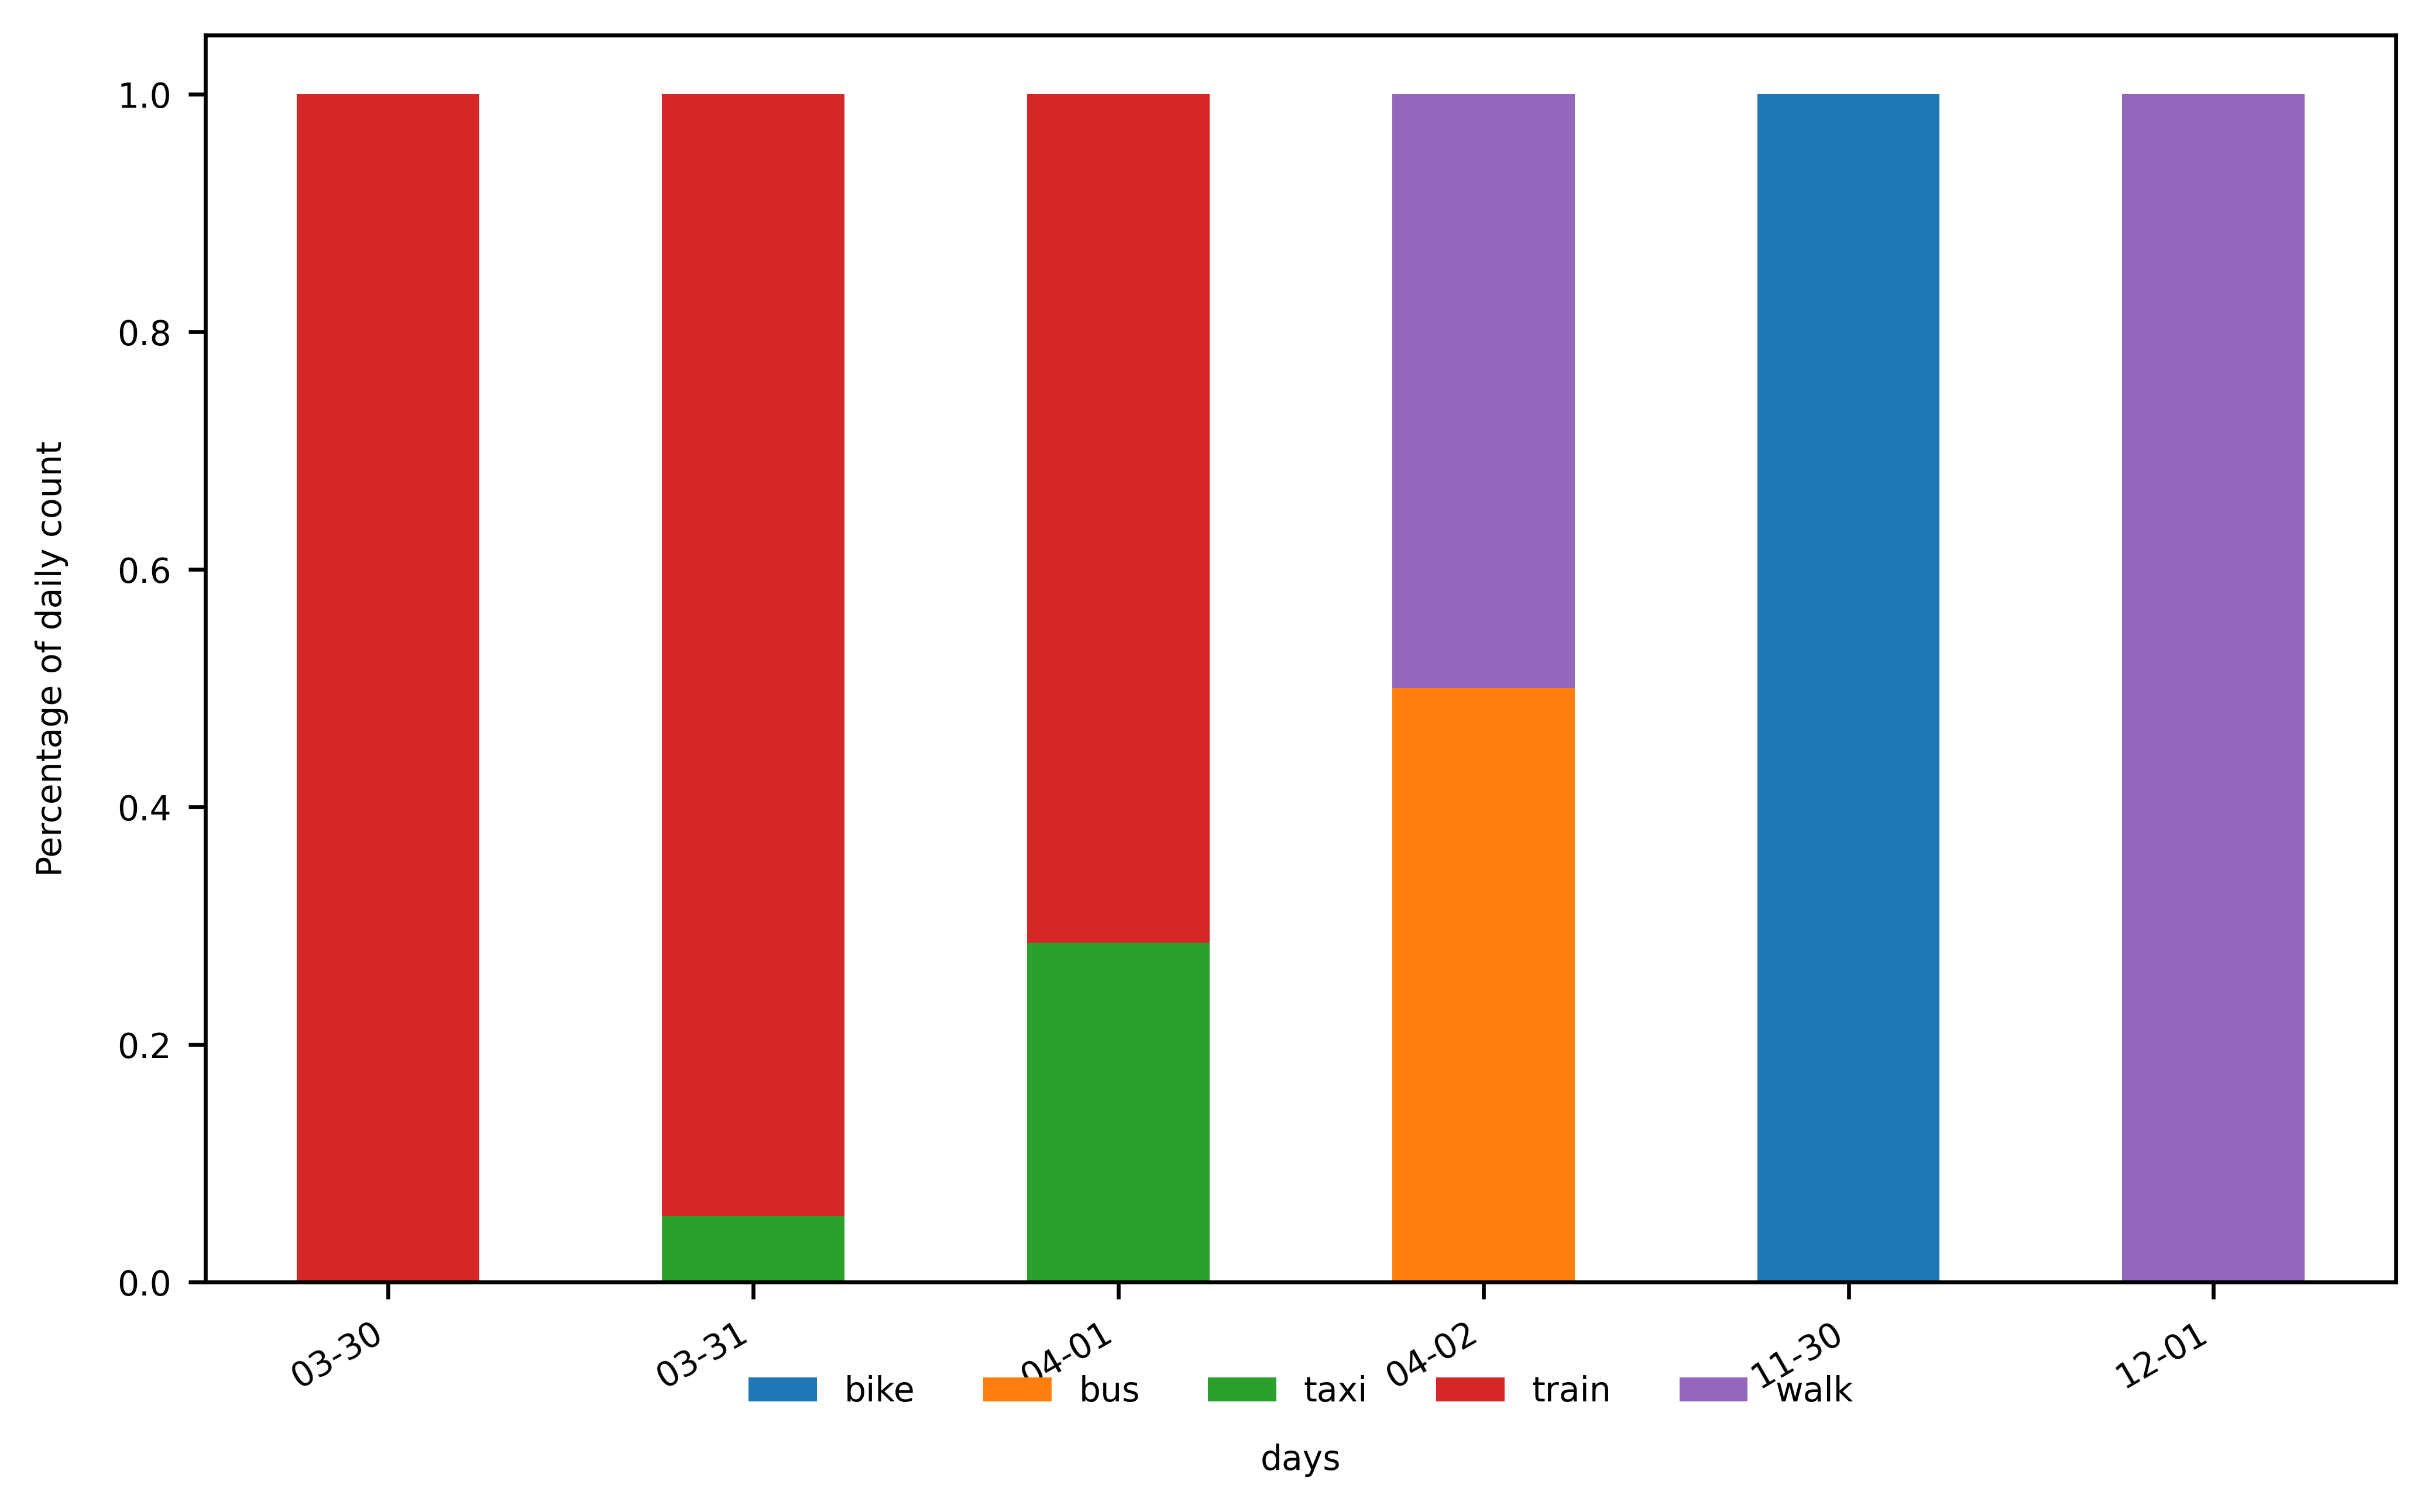

In [23]:
# the modal split can then be calculated
modal_split = ti.analysis.calculate_modal_split(tpls_with_modes, metric="count", freq="D", per_user=False, norm=True)

# and visualized
ti.plot_modal_split(modal_split, date_fmt_x_axis='%m-%d', y_label='Percentage of daily count', x_label='days')
plt.show()

# Save results
The generated data can be exported as csv files using [`to_csv()` functions](https://trackintel.readthedocs.io/en/latest/modules/io.html#csv-file-export) registered to each data model. For each function in the visualization module, we provide an `filename` parameter to directly save the figures as a file.

In [24]:
# save datamodels to csv files
pfs.to_csv('./out/pfs_tutorial.csv')
sp.to_csv('./out/sp_tutorial.csv')
tpls.to_csv('./out/tpls_tutorial.csv')
trips.to_csv('./out/trips_tutorial.csv')

# filename will save the generated plot as a file
ti.plot(filename='./out/pfs.png', positionfixes=pfs)

For database users, we provide functions and instructions to support the import and export from PostGIS databases. Further information can be found in the [trackintel documentation](https://trackintel.readthedocs.io/en/latest/). 

Thanks for using trackintel. If you discover any bug and/or have an idea for a usful funcionality feel free to open an [issue](https://github.com/mie-lab/trackintel/issues)